In [ ]:
import os
import tensorflow as tf

In [ ]:
os.listdir('/content/drive/MyDrive/data')

['happy', 'sad']

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
#removing images have unwanted file types from our image sets
for img_class in os.listdir(data_dir):
  for img in os.listdir(os.path.join(data_dir,img_class)):
    img_path = os.path.join(data_dir,img_class,img)

    try:
      #img = cv2.imread(img_path)
      tip = imghdr.what(img_path)

      if tip not in image_exts:
        os.remove(img_path)
        print('Image not in ext list {}'.format(img_path))
#      else:
#        print('Image in ext list {}'.format(img_path))
    except:
      print('Issue with image {}'.format(img_path))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 419 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
type(batch[0][1])

numpy.ndarray

In [ ]:
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

Text(0.5, 1.0, '0')

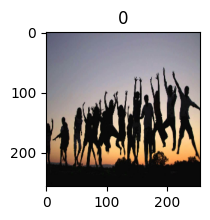

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(batch[0][23].astype(int)) #astype(int) cus values are float
plt.title(batch[1][23])

#class 0 -> happy
#class 1 -> sad

In [ ]:
data = data.map(lambda x,y: (x/255.0,y))

In [ ]:
batch1 = data.as_numpy_iterator().next()

In [ ]:
batch1[1]

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

Text(0.5, 1.0, '0')

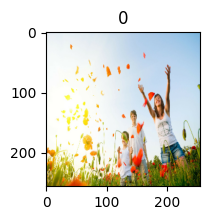

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(batch1[0][20])
plt.title(batch1[1][20])

In [ ]:
len(data)
#number of how many batch we have

14

In [ ]:
train_size = 4 #as batches
val_size = 1
test_size = 1


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential( [
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32,(3,3),1,padding="same",activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(16,(3,3),1,padding="same",activation="relu",input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 63, 63, 16)        4624      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 31, 31, 16)      

In [ ]:
hist = model.fit(train,epochs=15,validation_data=val)

Epoch 1/15
4/4 [==============================] - 16s 3s/step - loss: 1.2555 - accuracy: 0.5547 - val_loss: 0.6453 - val_accuracy: 0.6562
Epoch 2/15
4/4 [==============================] - 15s 4s/step - loss: 0.7161 - accuracy: 0.6094 - val_loss: 0.6712 - val_accuracy: 0.5000
Epoch 3/15
4/4 [==============================] - 12s 2s/step - loss: 0.6610 - accuracy: 0.5078 - val_loss: 0.6876 - val_accuracy: 0.3438
Epoch 4/15
4/4 [==============================] - 16s 4s/step - loss: 0.6319 - accuracy: 0.6484 - val_loss: 0.6875 - val_accuracy: 0.7812
Epoch 5/15
4/4 [==============================] - 17s 4s/step - loss: 0.5716 - accuracy: 0.7812 - val_loss: 0.5041 - val_accuracy: 0.7812
Epoch 6/15
4/4 [==============================] - 17s 4s/step - loss: 0.5509 - accuracy: 0.7266 - val_loss: 0.6203 - val_accuracy: 0.7188
Epoch 7/15
4/4 [==============================] - 13s 3s/step - loss: 0.5186 - accuracy: 0.7578 - val_loss: 0.6082 - val_accuracy: 0.7188
Epoch 8/15
4/4 [==================

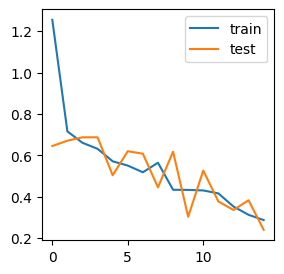

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(hist.history['loss'],label="train")
plt.plot(hist.history['val_loss'],label="test")

plt.legend()

plt.show()

In [ ]:
model.evaluate(test)

1/1 [==============================] - 6s 6s/step - loss: 0.2346 - accuracy: 0.9062


[0.2346382439136505, 0.90625]

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  y_pred = model.predict(x)

  pre.update_state(y,y_pred)
  re.update_state(y,y_pred)
  acc.update_state(y,y_pred)



1/1 [==============================] - 0s 97ms/step


In [ ]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

0.75 1.0 0.84375


In [ ]:
import cv2

In [ ]:
image = cv2.imread("/content/drive/MyDrive/data/image2.jpg")

resize = tf.image.resize(image,(256,256))

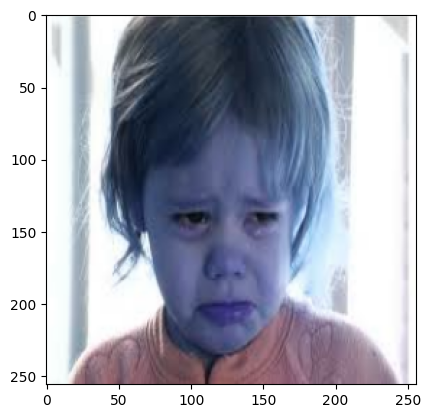

In [ ]:
plt.imshow(resize.numpy().astype(int))

In [ ]:
resize = np.expand_dims(resize/255, 0) #turns our image to a 4d tensor with adding 1 more dimension, 'cause model wants arguments in this shape

In [ ]:
predicted = model.predict(resize)

predicted

1/1 [==============================] - 0s 26ms/step


array([[0.9098962]], dtype=float32)

In [ ]:
if predicted < 0.5:
  print("predicted as happy")
else:
  print("predicted as sad")


predicted as sad


In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models','imageclassifier.h5'))